In [1]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

import numpy as np
import scipy
from astropy.io import fits

In [2]:
random_flat_HDU = fits.open('../../group01_WASP-44_20201120/flat/AF642522.fits')

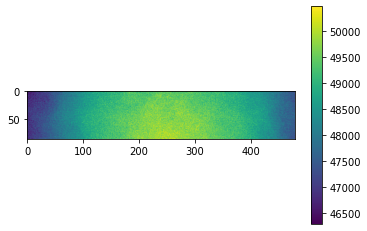

In [3]:
## Pay attention, FORTRAN and Python have row-columns inverted

plt.figure()
random_flat_data = random_flat_HDU[0].data - 1452.5 #(average bias)
plt.imshow(random_flat_data[5:94, 26:505])
plt.colorbar()


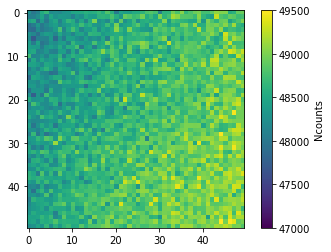

In [4]:
plt.figure()
plt.imshow(random_flat_data[10:60, 110:160], clim=(47000, 49500))
cbar = plt.colorbar()
cbar.set_label("Ncounts")

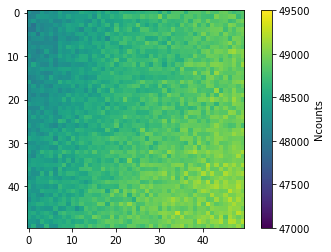

In [5]:
plt.figure()
master_flat_HDU = fits.open('../../group01_WASP-44_20201120/flat/mf.fits')
master_flat_data = master_flat_HDU[0].data
plt.imshow(master_flat_data[10:60, 110:160], clim=(47000, 49500))
cbar = plt.colorbar()
cbar.set_label("Ncounts")


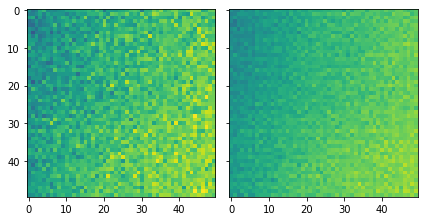

In [6]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].imshow(random_flat_data[10:60, 110:160], clim=(47000, 49500))
axs[1].imshow(master_flat_data[10:60, 110:160], clim=(47000, 49500))


we definetely see some pixels have a different response

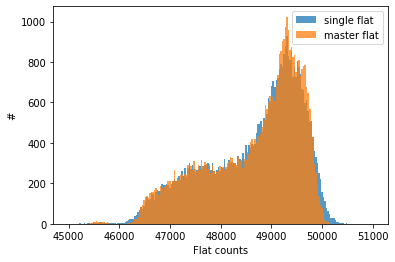

In [7]:
plt.figure()
hist_range= (45000, 51000)
hist_bins= 200

_ = plt.hist(random_flat_data.flatten(), bins=hist_bins, range=hist_range, alpha=0.75, label='single flat')
_ = plt.hist(master_flat_data.flatten(), bins=hist_bins, range=hist_range, alpha=0.75, label='master flat')
plt.xlabel('Flat counts')
plt.ylabel('#')
plt.legend()
plt.show()

In [8]:
print('Standard deviation of random flat : {0:.2f}'.format(np.std(random_flat_data[50:71, 100:121])))
print('Standard deviation of master flat : {0:.2f}'.format(np.std(master_flat_data[50:71, 100:121])))


Standard deviation of random flat : 222.35
Standard deviation of master flat : 148.89


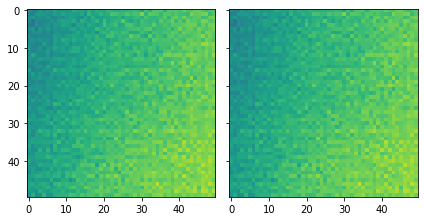

In [9]:
median = 49044.4844

normalized_flat_HDU = fits.open('../../group01_WASP-44_20201120/flat/mfn.fits')
normalized_flat_data = normalized_flat_HDU[0].data

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].imshow(master_flat_data[10:60, 110:160], clim=(47000, 49500))
axs[1].imshow(normalized_flat_data[10:60, 110:160], clim=(47000/median, 49500/median))


